<a href="https://colab.research.google.com/github/trjgdyan/PCVK_Genap_2021/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Tri Jagad Ariyani
# Kelas : 3CTI
# NIM : 2141720049

**MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point
Detection, Line Detection, Edge Detection**

**Praktikum**

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.


# Konvolusi Tanpa Library

**Membuat fungsi konvolusi**

Fungsi konvolusi yang dibuat memiliki parameter berupa:
1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambahkan pada citra

d. Load citra yang akan diproses dan ubah menajadi citra keabuan

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:


f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

In [69]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [70]:
img_m = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

3. Buat Image filter untuk average filter, low pass filter, high pass filter dan beberapa filter berikut

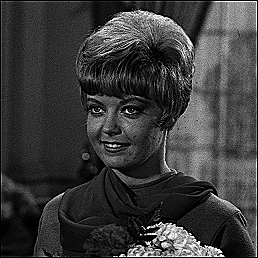

In [71]:
# Operasi Sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

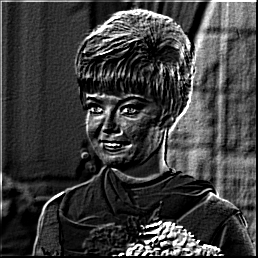

In [72]:
#Operasi Emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])
cv2_imshow(convolution2d(img_gray, kernel_emboss, 1,2))

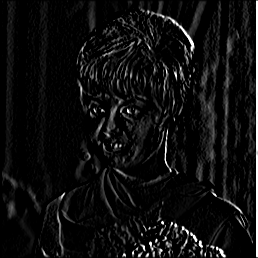

In [73]:
#Operasi Left sobel Edge Detection
kernel_leftsobel = np.array([[1,0,-1],
                             [2,0,-2],
                             [1,0,-1]])
cv2_imshow(convolution2d(img_gray, kernel_leftsobel, 1,2))

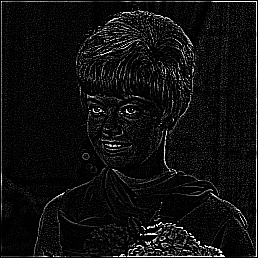

In [74]:
#Operasi Canny Edge Detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray, kernel_canny, 1,2))

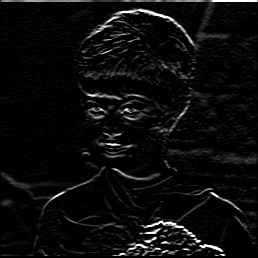

In [75]:
#Operasi Prewitt Edge
kernel_prewitt = np.array([[-1,-1,-1],
                         [0,0,0],
                         [1,1,1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1,2))

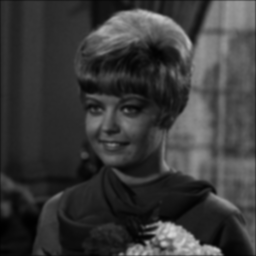

In [77]:
# 5x5 Gaussian Blurr
kernel_blur5x5 = np.array([[1,4,6,4,1],
                              [4,16,24,16,4],
                              [6,24,36,24,6],
                              [4,16,24,16,4],
                              [1,4,6,4,1]]) / 256
cv2_imshow(convolution2d(img_gray, kernel_blur5x5, 1,2))

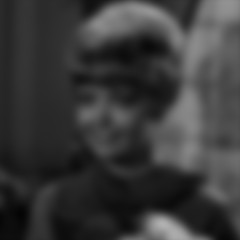

In [78]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

# E. Tugas

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP

<ipython-input-79-6cdece5b532c>:62: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 4)
<ipython-input-79-6cdece5b532c>:66: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 5)
<ipython-input-79-6cdece5b532c>:70: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 6)


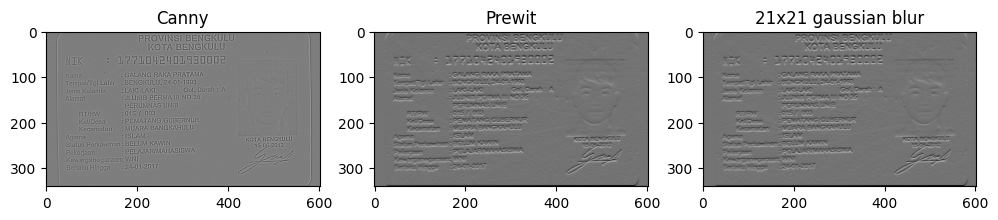

In [79]:
# KTP 1

#Load citra yang digunakan dan diubah menjadi citra keabuan
img_1 = cv.imread('/content/drive/MyDrive/PCVK/images/KTP_More/ktp1.png')
img_s = cv.resize(img_1, (0,0), fx=0.5, fy=0.5)
img_grayktp1 = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)
#cv2_imshow(img_1)

#Operasi sharpen
kernel_sharpenktp1 = np.array([[0,-1,0],
                               [-1,5,-1],
                               [0,-1,0]])

#Operasi Emboss
kernel_embossktp1 = np.array([[-2,-1,0],
                               [-1,1,1],
                               [0,1,2]])

#Operasi Sobel
kernel_sobelktp1 = np.array([[1,0,-1],
                               [2,0,-2],
                               [1,0,-1]])
#Operasi canny
kernel_cannyktp1 = np.array([[-1,-1,-1],
                               [-1,8,-1],
                               [-1,-1,-1]])

#Operasi canny
kernel_prewitktp1 = np.array([[-1,-1,-1],
                               [0,0,0],
                               [1,1,1]])

#Operasi 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernelktp1 = gaussian_kernel @ gaussian_kernel.transpose()

result_sharpenktp1 = convolution2d(img_grayktp1, kernel_sharpenktp1, 1, 2)
result_embossktp1 = convolution2d(img_grayktp1, kernel_embossktp1, 1, 2)
result_sobelktp1 = convolution2d(img_grayktp1, kernel_sobelktp1, 1, 2)
result_cannyktp1 = convolution2d(img_grayktp1, kernel_cannyktp1, 1, 2)
result_prewitktp1 = convolution2d(img_grayktp1, kernel_prewitktp1, 1, 2)
result_gaussian_kernel = convolution2d(img_grayktp1, gauss_kernelktp1, 1, 2)

plt.figure(figsize=(12, 6))

# Subplot baris pertama (Sharpen, Emboss, Sobel)
plt.subplot(1, 3, 1)
plt.imshow(result_sharpenktp1, cmap='gray')
plt.title('Sharpen')

plt.subplot(1, 3, 2)
plt.imshow(result_embossktp1, cmap='gray')
plt.title('Emboss')

plt.subplot(1, 3, 3)
plt.imshow(result_sobelktp1, cmap='gray')
plt.title('Sobel')

# Subplot baris kedua (Canny, Prewit, dan 21x21 gaussian blur)
plt.subplot(2, 3, 4)
plt.imshow(result_cannyktp1, cmap='gray')
plt.title('Canny')

plt.subplot(2, 3, 5)
plt.imshow(result_prewitktp1, cmap='gray')
plt.title('Prewit')

plt.subplot(2, 3, 6)
plt.imshow(result_prewitktp1, cmap='gray')
plt.title('21x21 gaussian blur')

plt.show()
